In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [266]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import RFE, SelectKBest, f_classif, f_regression
from sklearn import metrics

## Reading the data

In [267]:
train=pd.read_csv('train.csv')

In [268]:
len(train['Id'].unique())

2051

In [269]:
# dropping the Id and PID columns, they won't effect the response variable
train.drop(['Id','PID','Sale Condition'],axis=1,inplace=True)

In [270]:
train.shape

(2051, 79)

In [271]:
# change the column's names to not include spaces
train.columns = map(lambda x: x.replace(' ', ''), train.columns)

In [272]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SalePrice
0,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [273]:
test=pd.read_csv('test.csv')

In [274]:
# Assigning Id to ID_test
ID_test=test['Id']

In [275]:
# dropping the Id and PID columns in the test, they won't effect the response variable
test.drop(['Id','PID'],axis=1,inplace=True)

In [276]:
test.shape

(879, 78)

In [277]:
# change the column's names to not include spaces
test.columns = map(lambda x: x.replace(' ', ''), test.columns)

In [278]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType
0,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


## Cleaning Data

In [279]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 79 columns):
MSSubClass       2051 non-null int64
MSZoning         2051 non-null object
LotFrontage      1721 non-null float64
LotArea          2051 non-null int64
Street           2051 non-null object
Alley            140 non-null object
LotShape         2051 non-null object
LandContour      2051 non-null object
Utilities        2051 non-null object
LotConfig        2051 non-null object
LandSlope        2051 non-null object
Neighborhood     2051 non-null object
Condition1       2051 non-null object
Condition2       2051 non-null object
BldgType         2051 non-null object
HouseStyle       2051 non-null object
OverallQual      2051 non-null int64
OverallCond      2051 non-null int64
YearBuilt        2051 non-null int64
YearRemod/Add    2051 non-null int64
RoofStyle        2051 non-null object
RoofMatl         2051 non-null object
Exterior1st      2051 non-null object
Exterior2nd      2051 non

In [280]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 78 columns):
MSSubClass       879 non-null int64
MSZoning         879 non-null object
LotFrontage      719 non-null float64
LotArea          879 non-null int64
Street           879 non-null object
Alley            58 non-null object
LotShape         879 non-null object
LandContour      879 non-null object
Utilities        879 non-null object
LotConfig        879 non-null object
LandSlope        879 non-null object
Neighborhood     879 non-null object
Condition1       879 non-null object
Condition2       879 non-null object
BldgType         879 non-null object
HouseStyle       879 non-null object
OverallQual      879 non-null int64
OverallCond      879 non-null int64
YearBuilt        879 non-null int64
YearRemod/Add    879 non-null int64
RoofStyle        879 non-null object
RoofMatl         879 non-null object
Exterior1st      879 non-null object
Exterior2nd      879 non-null object
MasVnrType   

## Dealing with outliers

Text(0,0.5,'GrLivArea')

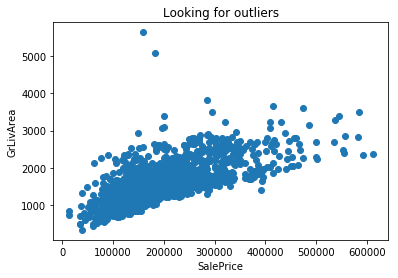

In [281]:
# git rid of outliers
plt.scatter(train['SalePrice'],train['GrLivArea'])
plt.title("Looking for outliers")
plt.xlabel("SalePrice")
plt.ylabel("GrLivArea")

Text(0,0.5,'SalePrice')

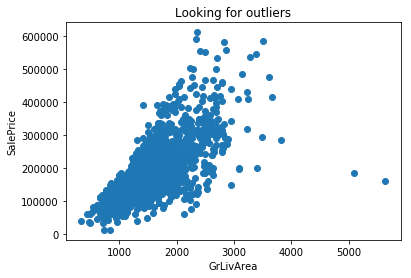

In [282]:
# git rid of outliers
plt.scatter(train['GrLivArea'],train["SalePrice"])
plt.title("Looking for outliers")
plt.xlabel('GrLivArea')
plt.ylabel("SalePrice")

In [283]:
#Found a couple of outliers - low sale price and Large living area  -  Lets get rid of those

train = train[train['GrLivArea'] < 4500]

## Dealing with missing values and data types

(nan, nan)

## checking max/min values of numeric columns

In [350]:
# checking years dont exceed 2018
train[['YearBuilt', 'YearRemod/Add', 'GarageYrBlt', 'YrSold']].max()

YearBuilt        2010.0
YearRemod/Add    2010.0
GarageYrBlt      2207.0
YrSold           2010.0
dtype: float64

In [351]:
# changing the value of garage yr belt >2018
train.loc[train['GarageYrBlt']==2207,'GarageType']
train['GarageYrBlt'][1699]=train['YearBuilt'][1699]
train['GarageYrBlt'][1699]

/Users/tala/Desktop/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


2006.0

In [352]:
# checking no negative values for areas,distace, etc
train._get_numeric_data().columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemod/Add', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [353]:
train[(train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemod/Add', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice']]<0).any(axis=1)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SalePrice


## Double checking no missing values

In [354]:
test.info() , train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 78 columns):
MSSubClass       879 non-null int64
MSZoning         879 non-null object
LotFrontage      879 non-null float64
LotArea          879 non-null int64
Street           879 non-null object
Alley            879 non-null object
LotShape         879 non-null object
LandContour      879 non-null object
Utilities        879 non-null object
LotConfig        879 non-null object
LandSlope        879 non-null object
Neighborhood     879 non-null object
Condition1       879 non-null object
Condition2       879 non-null object
BldgType         879 non-null object
HouseStyle       879 non-null object
OverallQual      879 non-null int64
OverallCond      879 non-null int64
YearBuilt        879 non-null int64
YearRemod/Add    879 non-null int64
RoofStyle        879 non-null object
RoofMatl         879 non-null object
Exterior1st      879 non-null object
Exterior2nd      879 non-null object
MasVnrType  

(None, None)

## EDA

In [355]:
train.corr()['SalePrice'].abs().sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.803437
GrLivArea        0.719667
TotalBsmtSF      0.665108
GarageArea       0.655424
GarageCars       0.648612
1stFlrSF         0.648185
YearBuilt        0.572416
YearRemod/Add    0.551469
FullBath         0.538378
MasVnrArea       0.511153
TotRmsAbvGrd     0.509687
Fireplaces       0.473617
BsmtFinSF1       0.446361
BsmtFinSF2       0.446361
OpenPorchSF      0.339125
LotFrontage      0.338180
WoodDeckSF       0.327667
LotArea          0.303871
BsmtFullBath     0.284724
HalfBath         0.283146
GarageYrBlt      0.258866
2ndFlrSF         0.249039
BsmtUnfSF        0.190695
BedroomAbvGr     0.136967
EnclosedPorch    0.135565
ScreenPorch      0.134446
KitchenAbvGr     0.125580
OverallCond      0.096933
MSSubClass       0.087525
3SsnPorch        0.048680
BsmtHalfBath     0.045652
LowQualFinSF     0.041661
MoSold           0.031837
PoolArea         0.025781
YrSold           0.015645
MiscVal          0.010368
Name: SalePrice, dtype: float64

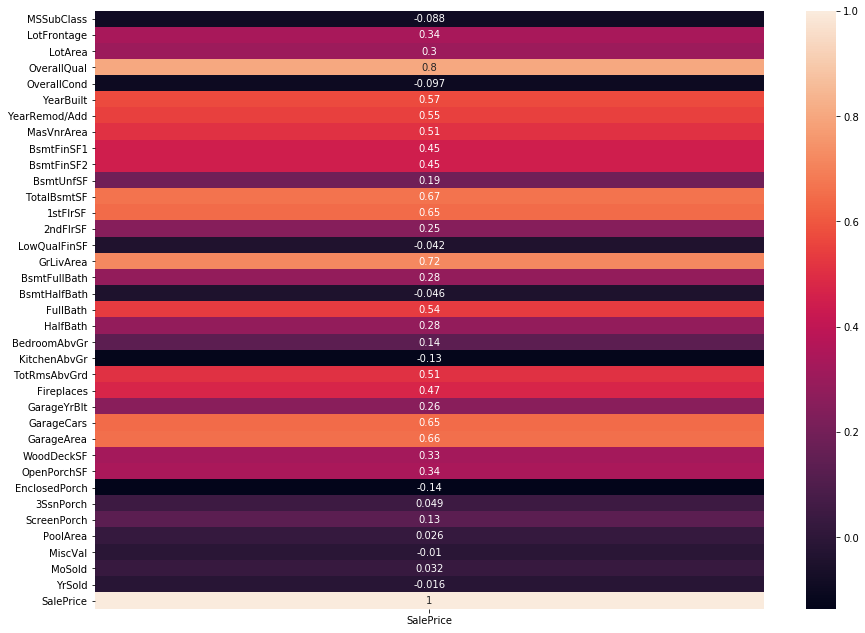

In [356]:
plt.figure(figsize=(15,11))
sns.heatmap(train.corr()[['SalePrice']], annot=True)

(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,
         18.5,  19.5]), <a list of 20 Text xticklabel objects>)

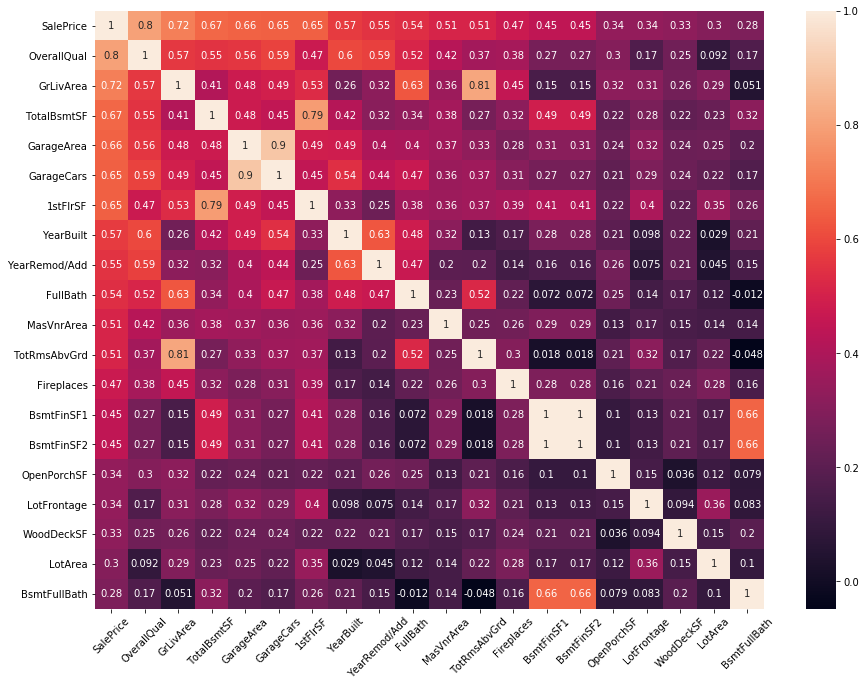

In [357]:
k = 20 #number of variables for heatmap
cols = train.corr().abs().nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
plt.figure(figsize=(15,11))
sns.heatmap(cm, annot=True,xticklabels=cols.values,yticklabels=cols.values)
plt.xticks(rotation=45)

(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,
         18.5,  19.5,  20.5,  21.5,  22.5,  23.5,  24.5]),
 <a list of 25 Text xticklabel objects>)

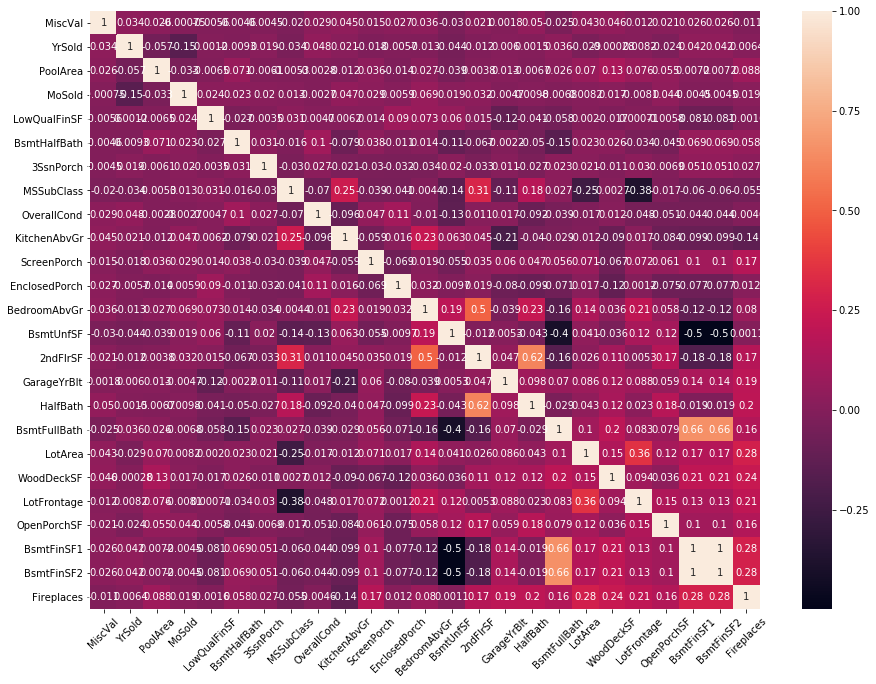

In [358]:
k = 25 #number of variables for heatmap
cols = train.corr().abs().nsmallest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
plt.figure(figsize=(15,11))
sns.heatmap(cm, annot=True,xticklabels=cols.values,yticklabels=cols.values)
plt.xticks(rotation=45)

In [359]:
# # # drop some variable with multicollinearity
# train.drop('TotRmsAbvGrd',axis=1,inplace=True)
# test.drop('TotRmsAbvGrd',axis=1,inplace=True)

# train.drop('GarageCars',axis=1,inplace=True)
# test.drop('GarageCars',axis=1,inplace=True)

# train.drop('1stFlrSF',axis=1,inplace=True)
# test.drop('1stFlrSF',axis=1,inplace=True)

# train.drop('YearRemod/Add',axis=1,inplace=True)
# test.drop('YearRemod/Add',axis=1,inplace=True)

# train.drop('BsmtFinSF2',axis=1,inplace=True)
# test.drop('BsmtFinSF2',axis=1,inplace=True)

In [360]:
train.shape , test.shape

((2047, 79), (879, 78))

## normalize the saleprice

In [361]:
# sqrt transform the Sale price to make it more normally distributed and then drop it from the features

train['SalePrice'] = np.sqrt(train['SalePrice'])

## Numerical cols to categories

In [362]:
# Some numerical features are actually really categories - switch them back

train = train.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"}})

In [363]:
test = test.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"}})

## Encoding some categorical features that are ordinal

In [364]:
# encode some categorical features
train = train.replace({ "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageFinish" : {"No" : 0, "Unf" : 1, "RFn" : 2, "Fin" : 3},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4}})

In [365]:
train[["BsmtCond" ,"BsmtQual" ,"ExterCond" ,"ExterQual" ,"FireplaceQu" ,"GarageCond" ,
       "GarageQual" ,"GarageFinish", "HeatingQC","KitchenQual" ,
                       "PoolQC" ]].dtypes

BsmtCond        int64
BsmtQual        int64
ExterCond       int64
ExterQual       int64
FireplaceQu     int64
GarageCond      int64
GarageQual      int64
GarageFinish    int64
HeatingQC       int64
KitchenQual     int64
PoolQC          int64
dtype: object

In [366]:
test = test.replace({ "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageFinish" : {"No" : 0, "Unf" : 1, "RFn" : 2, "Fin" : 3},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4}})

In [367]:
test[["BsmtCond" ,"BsmtQual" ,"ExterCond" ,"ExterQual" ,"FireplaceQu" ,"GarageCond" ,
       "GarageQual" ,"GarageFinish", "HeatingQC","KitchenQual" ,
                       "PoolQC" ]].dtypes

BsmtCond        int64
BsmtQual        int64
ExterCond       int64
ExterQual       int64
FireplaceQu     int64
GarageCond      int64
GarageQual      int64
GarageFinish    int64
HeatingQC       int64
KitchenQual     int64
PoolQC          int64
dtype: object

In [368]:
train.shape , test.shape

((2047, 79), (879, 78))

## Combining features

In [369]:
# train[['GrLivArea','1stFlrSF','2ndFlrSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']]
train[['BsmtQual','BsmtCond']]
train[['ExterQual','ExterCond','SalePrice']].corr()

,ExterQual,ExterCond,SalePrice
ExterQual,1.000000,0.035128,0.716712
ExterCond,0.035128,1.000000,0.057321
SalePrice,0.716712,0.057321,1.000000


In [370]:
# Total number of bathrooms
train["TotalBath"] = train["BsmtFullBath"] + (0.5 * train["BsmtHalfBath"]) + \
train["FullBath"] + (0.5 * train["HalfBath"])

# Total SF for 1basement
train["TotalBsmtSF"] = train["BsmtFinSF1"] + train["BsmtUnfSF"]

# Total SF for porch
train["AllPorchSF"] = train["OpenPorchSF"] + train["EnclosedPorch"] + \
train["3SsnPorch"] + train["ScreenPorch"]

# Total Garage Quality
train['TotalGarageQa'] = train['GarageCond'] + train['GarageQual'] + train['GarageFinish']

# Total Basement Quality
train['TotalBasementQa'] = train['BsmtQual'] + train['BsmtCond']

# Total Exterior Quality
train['TotalExterQa'] = train['ExterQual'] + train['ExterCond']


In [371]:
train.drop(["BsmtFullBath",
            "BsmtHalfBath","FullBath","HalfBath","OpenPorchSF","BsmtFinSF1","BsmtUnfSF",
            "EnclosedPorch","3SsnPorch","ScreenPorch",'GarageCond','GarageQual','GarageFinish','BsmtQual','BsmtCond',
          'ExterQual','ExterCond' ],axis = 1, inplace = True)

In [372]:
# Total number of bathrooms
test["TotalBath"] = test["BsmtFullBath"] + (0.5 * test["BsmtHalfBath"]) + \
test["FullBath"] + (0.5 * test["HalfBath"])

# Total SF for 1basement
test["TotalBsmtSF"] = test["BsmtFinSF1"] + test["BsmtUnfSF"]

# Total SF for porch
test["AllPorchSF"] = test["OpenPorchSF"] + test["EnclosedPorch"] + \
test["3SsnPorch"] + test["ScreenPorch"]

# Total Garage Quality
test['TotalGarageQa'] = test['GarageCond'] + test['GarageQual'] + test['GarageFinish']

# Total Basement Quality
test['TotalBasementQa'] = test['BsmtQual'] + test['BsmtCond']

# Total Exterior Quality
test['TotalExterQa'] = test['ExterQual'] + test['ExterCond']


In [373]:
test.drop(["BsmtFullBath",
            "BsmtHalfBath","FullBath","HalfBath","OpenPorchSF","BsmtFinSF1","BsmtUnfSF",
            "EnclosedPorch","3SsnPorch","ScreenPorch",'GarageCond','GarageQual','GarageFinish','BsmtQual','BsmtCond',
          'ExterQual','ExterCond' ],axis = 1, inplace = True)

In [374]:
train.shape , test.shape

((2047, 67), (879, 66))

In [375]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemod/Add', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'Foundation', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'BsmtFinSF2', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'PoolArea',
       'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold',
       'SaleType', 'SalePrice', 'TotalBath', 'AllPorchSF', 'TotalGarageQa',
       'TotalBasementQa', 

In [376]:
train.corr()['SalePrice'].abs().sort_values(ascending=False)

SalePrice          1.000000
OverallQual        0.826545
GrLivArea          0.726272
KitchenQual        0.701237
GarageCars         0.670555
GarageArea         0.667481
TotalBath          0.658443
1stFlrSF           0.647447
TotalBsmtSF        0.638368
TotalExterQa       0.625542
YearBuilt          0.609560
YearRemod/Add      0.586209
FireplaceQu        0.551755
TotalBasementQa    0.540484
TotRmsAbvGrd       0.512775
Fireplaces         0.489598
TotalGarageQa      0.489459
HeatingQC          0.488349
MasVnrArea         0.486852
BsmtFinSF2         0.444229
LotFrontage        0.339624
WoodDeckSF         0.334928
LotArea            0.300466
GarageYrBlt        0.297129
2ndFlrSF           0.257983
AllPorchSF         0.217229
BedroomAbvGr       0.156657
KitchenAbvGr       0.134105
OverallCond        0.073584
LowQualFinSF       0.047875
PoolQC             0.038254
MoSold             0.032032
PoolArea           0.029654
YrSold             0.017276
MiscVal            0.006898
Name: SalePrice, dty

## Hot encoding categorical features

In [377]:
categorical_feature_names=train.select_dtypes(include=['object']).columns
len(categorical_feature_names)

32

In [378]:
categories={} # contains all the levels in those feature columns
for f in categorical_feature_names:
    # to make sure the type is indeed category
    train[f] = train[f].astype('category')
    categories[f] = train[f].cat.categories

In [379]:
new_train = pd.get_dummies(train,columns=categorical_feature_names)
new_train.head(2)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemod/Add,MasVnrArea,BsmtFinSF2,TotalBsmtSF,HeatingQC,...,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,68.0,13517,6,8,1976,2005,289.0,533.0,725.0,5,...,0,0,0,0,0,0,0,0,0,1
1,43.0,11492,7,5,1996,1997,132.0,637.0,913.0,5,...,0,0,0,0,0,0,0,0,0,1


In [380]:
for f in categorical_feature_names:
    test[f] = test[f].astype('category')    
    test[f].cat.set_categories(categories[f],inplace=True)

In [381]:
new_test = pd.get_dummies(test,columns = categorical_feature_names)

In [382]:
new_test.head(2)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemod/Add,MasVnrArea,BsmtFinSF2,TotalBsmtSF,HeatingQC,...,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,69.0,9142,6,8,1910,1950,0.0,0.0,1020.0,4,...,0,0,0,0,0,0,0,0,0,1
1,68.0,9662,5,4,1977,1977,0.0,0.0,1967.0,3,...,0,0,0,0,0,0,0,0,0,1


In [383]:
new_train.shape , new_test.shape

((2047, 258), (879, 257))

In [396]:
new_train.corr()['SalePrice'].abs().sort_values(ascending=False)[1:55].index

Index(['OverallQual', 'GrLivArea', 'KitchenQual', 'GarageCars', 'GarageArea',
       'TotalBath', '1stFlrSF', 'TotalBsmtSF', 'TotalExterQa', 'YearBuilt',
       'YearRemod/Add', 'FireplaceQu', 'Foundation_PConc', 'TotalBasementQa',
       'TotRmsAbvGrd', 'Fireplaces', 'TotalGarageQa', 'HeatingQC',
       'MasVnrArea', 'BsmtFinType1_GLQ', 'BsmtFinSF2', 'Neighborhood_NridgHt',
       'MasVnrType_None', 'GarageType_Attchd', 'GarageType_Detchd',
       'MSSubClass_SC60', 'Exterior1st_VinylSd', 'BsmtExposure_Gd',
       'Exterior2nd_VinylSd', 'Foundation_CBlock', 'BsmtExposure_No',
       'SaleType_New', 'LotFrontage', 'PavedDrive_Y', 'WoodDeckSF',
       'CentralAir_Y', 'CentralAir_N', 'PavedDrive_N', 'LotShape_Reg',
       'MSZoning_RM', 'LotArea', 'MasVnrType_Stone', 'GarageYrBlt',
       'MSSubClass_SC30', 'LotShape_IR1', 'Electrical_SBrkr',
       'MasVnrType_BrkFace', 'GarageType_No', 'MSZoning_RL', '2ndFlrSF',
       'Foundation_BrkTil', 'Neighborhood_NoRidge', 'RoofStyle_Hip',
     

## Creating a model

In [385]:
#  defining features X,y
y =new_train['SalePrice']
features = ['OverallQual', 'GrLivArea', 'KitchenQual', 'GarageCars', 'GarageArea',
       'TotalBath', '1stFlrSF', 'TotalBsmtSF', 'TotalExterQa', 'YearBuilt',
       'YearRemod/Add', 'FireplaceQu', 'Foundation_PConc', 'TotalBasementQa',
       'TotRmsAbvGrd', 'Fireplaces', 'TotalGarageQa', 'HeatingQC',
       'MasVnrArea', 'BsmtFinType1_GLQ', 'BsmtFinSF2', 'Neighborhood_NridgHt',
       'MasVnrType_None', 'GarageType_Attchd', 'GarageType_Detchd',
       'MSSubClass_SC60', 'Exterior1st_VinylSd', 'BsmtExposure_Gd',
       'Exterior2nd_VinylSd', 'Foundation_CBlock', 'BsmtExposure_No',
       'SaleType_New', 'LotFrontage', 'PavedDrive_Y', 'WoodDeckSF',
       'CentralAir_Y', 'CentralAir_N', 'PavedDrive_N', 'LotShape_Reg',
       'MSZoning_RM', 'LotArea', 'MasVnrType_Stone', 'GarageYrBlt',
       'MSSubClass_SC30', 'LotShape_IR1', 'Electrical_SBrkr',
       'MasVnrType_BrkFace', 'GarageType_No', 'MSZoning_RL', '2ndFlrSF',
       'Foundation_BrkTil', 'Neighborhood_NoRidge', 'RoofStyle_Hip',
       'Neighborhood_OldTown']
X = new_train[features]

In [386]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, random_state=1)

In [387]:
poly = PolynomialFeatures(include_bias=False)

ss = StandardScaler()

lasso = Lasso()

pipe = Pipeline([
    ('poly',poly),
    ('ss', ss),
    ('lasso', lasso)
])

In [388]:
params = {'lasso__alpha': np.arange(.001, .15, .0025)
}
gs = GridSearchCV(pipe, param_grid=params)
print(cross_val_score(pipe,X_train, y_train).mean())
gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.918429762333


/Users/tala/Desktop/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tala/Desktop/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tala/Desktop/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tala/Desktop/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceW

/Users/tala/Desktop/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tala/Desktop/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tala/Desktop/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tala/Desktop/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceW

/Users/tala/Desktop/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tala/Desktop/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tala/Desktop/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tala/Desktop/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceW

/Users/tala/Desktop/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tala/Desktop/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tala/Desktop/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tala/Desktop/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceW

/Users/tala/Desktop/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tala/Desktop/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tala/Desktop/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tala/Desktop/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceW

/Users/tala/Desktop/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tala/Desktop/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tala/Desktop/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tala/Desktop/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceW

/Users/tala/Desktop/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tala/Desktop/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tala/Desktop/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tala/Desktop/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceW

0.910823614107
{'lasso__alpha': 0.14849999999999999}


/Users/tala/Desktop/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [389]:
gs.score(X_holdout,y_holdout)

0.90980166505856519

In [390]:
#  defining features (x_test) 
X_test=new_test [['OverallQual', 'GrLivArea', 'KitchenQual', 'GarageCars', 'GarageArea',
       'TotalBath', '1stFlrSF', 'TotalBsmtSF', 'TotalExterQa', 'YearBuilt',
       'YearRemod/Add', 'FireplaceQu', 'Foundation_PConc', 'TotalBasementQa',
       'TotRmsAbvGrd', 'Fireplaces', 'TotalGarageQa', 'HeatingQC',
       'MasVnrArea', 'BsmtFinType1_GLQ', 'BsmtFinSF2', 'Neighborhood_NridgHt',
       'MasVnrType_None', 'GarageType_Attchd', 'GarageType_Detchd',
       'MSSubClass_SC60', 'Exterior1st_VinylSd', 'BsmtExposure_Gd',
       'Exterior2nd_VinylSd', 'Foundation_CBlock', 'BsmtExposure_No',
       'SaleType_New', 'LotFrontage', 'PavedDrive_Y', 'WoodDeckSF',
       'CentralAir_Y', 'CentralAir_N', 'PavedDrive_N', 'LotShape_Reg',
       'MSZoning_RM', 'LotArea', 'MasVnrType_Stone', 'GarageYrBlt',
       'MSSubClass_SC30', 'LotShape_IR1', 'Electrical_SBrkr',
       'MasVnrType_BrkFace', 'GarageType_No', 'MSZoning_RL', '2ndFlrSF',
       'Foundation_BrkTil', 'Neighborhood_NoRidge', 'RoofStyle_Hip',
       'Neighborhood_OldTown']]

In [391]:
predictions_lasso = gs.predict(X_test)

In [392]:
predictions=(predictions_lasso)**2

In [393]:
new_test['SalePrice'] = predictions
submission = pd.concat([ID_test, new_test], axis=1)
submission.head(2)

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemod/Add,MasVnrArea,BsmtFinSF2,TotalBsmtSF,...,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SalePrice
0,2658,69.0,9142,6,8,1910,1950,0.0,0.0,1020.0,...,0,0,0,0,0,0,0,0,1,120875.801174
1,2718,68.0,9662,5,4,1977,1977,0.0,0.0,1967.0,...,0,0,0,0,0,0,0,0,1,164731.925260


In [139]:
submission[['Id', 'SalePrice']].to_csv('first.csv', index=False)